In [138]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from scipy.optimize import curve_fit
import scipy as sp
from scipy.optimize import newton

In [139]:
diodo = ascii.read("Diodo.txt")

In [140]:
diodo

v1,V(n001),V(n002),I(D1)
float64,float64,float64,float64
0.0,0.0,0.0,0.0
0.1,0.1,2.0367e-05,2.0367e-08
0.2,0.2,0.0002045893,2.045907e-07
0.3,0.3,0.001812759,1.813641e-06
0.4,0.4,0.01291261,1.291275e-05
0.5,0.5,0.05081588,5.081596e-05
0.6,0.6,0.1141192,0.0001141195
0.7,0.7,0.1907674,0.000190788
0.7999999999999999,0.8,0.2742884,0.0002742902


In [141]:
V = diodo['v1']-diodo['V(n002)']
I = diodo['I(D1)']

Text(0.5, 1.0, 'Curva I-V del diodo')

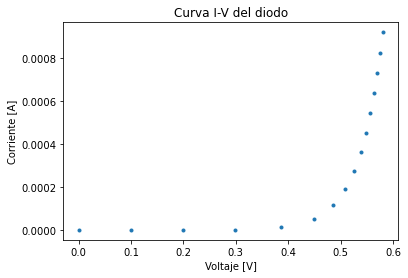

In [142]:
plt.plot(V, I, '.')
plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [A]')
plt.title('Curva I-V del diodo')

Datos de ajuste
T = -528.253139526976
I0 = 2.671286258445824e-09


Text(0, 0.5, 'Corriente [mA]')

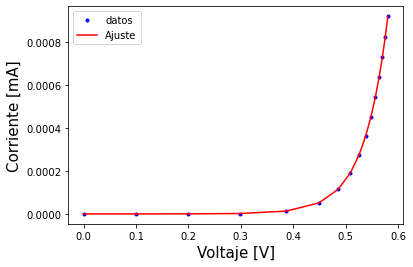

In [175]:
q = (-1)*1.6*10**(-19)
k = 1.38*10**(-23)

def co(v,i_0,T):
    return i_0*(np.exp(q*v/(T*k))-1)

c = sp.optimize.curve_fit(lambda t, a, b: a*(np.exp(b*t)-1), V, I, p0=(100.,0.2))

plt.plot(V, I, '.', label = 'datos', color = 'blue')
plt.plot(V, c[0][0]*np.exp(c[0][1]*V), label = 'Ajuste', color ='red')
plt.legend()
T1 = q/(c[0][1]*k)
Ix = c[0][0]
print('Datos de ajuste')
print('T =', T1)
print('I0 =', Ix)

plt.xlabel('Voltaje [V]', fontsize=15)
plt.ylabel('Corriente [mA]', fontsize=15)

In [178]:
I_ajuste = c[0][0]*np.exp(c[0][1]*V)
suma = 0
for i in range(len(I)):
    suma = suma + (I[i]-I_ajuste[i])**2
        
rms = np.sqrt((1/16)*suma)*1000  #rms en mA
print(rms)

0.0002935116542485042


In [162]:
R = 1000
V_in = diodo['v1']
V_out = []
for i in range(len(V_in)):
    def func(V):
        output = R*Ix*(np.exp(q*(V_in[i]-V)/(k*T1))-1) - V
        return output
    cero = newton(func,0.3)
    V_out.append(cero)

Text(0, 0.5, '$V_{out}$ [V]')

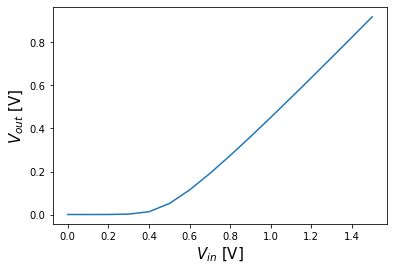

In [171]:
plt.plot(V_in, V_out)
plt.xlabel('$V_{in}$ [V]', fontsize=15)
plt.ylabel('$V_{out}$ [V]', fontsize=15)

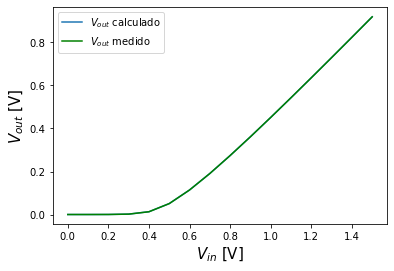

In [184]:
plt.plot(V_in, V_out, label='$V_{out}$ calculado')
plt.plot(V_in, diodo['V(n002)'], label='$V_{out}$ medido', color='green')
plt.xlabel('$V_{in}$ [V]', fontsize=15)
plt.ylabel('$V_{out}$ [V]', fontsize=15)
plt.legend()

(0.0, 500.0)

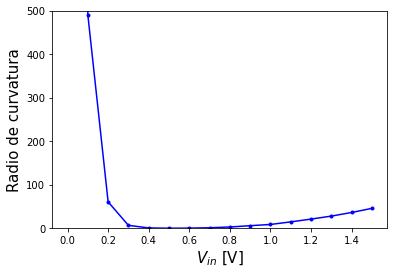

In [214]:
C2 = 0
D2 = 10**(-100)
Vin = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
Radio = [(1+(C2)**2)**(3/2)/D2, 4.91E+02, 6.10E+01, 7.03E+00, 1.07E+00, 4.56E-01, 6.53E-01, 1.50E+00, 3.22E+00, 6.24E+00, 9.04E+00, 1.50E+01, 2.14E+01, 2.83E+01, 3.66E+01, 4.61E+01]

plt.plot(V_in, Radio, '.', color = 'blue')
plt.plot(V_in, Radio, color='blue')
plt.xlabel('$V_{in}$ [V]', fontsize=15)
plt.ylabel('Radio de curvatura', fontsize=15)
plt.ylim(0,500)

Text(0, 0.5, 'Potencia 2º armónico [dB]')

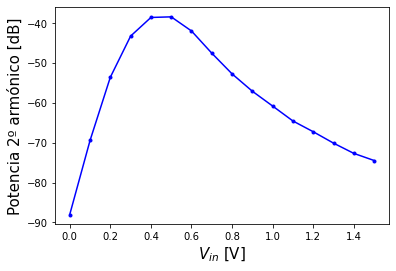

In [217]:
offset = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
armonico = [-88, -69.405, -53.518, -43.179, -38.5, -38.344, -41.896, -47.469, -52.671, -57.032, -60.755, -64.506, -67.206, -70.068, -72.643, -74.432]

plt.plot(offset, armonico, '.', color = 'blue')
plt.plot(offset, armonico, color='blue')
plt.xlabel('$V_{in}$ [V]', fontsize=15)
plt.ylabel('Potencia 2º armónico [dB]', fontsize=15)